# Chapter 5 - Computing transformations with matrices

In [1]:
from draw3d import *

from transforms import *

from random import randint

from functools import reduce

In [15]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

def scale(scalar,v):
    return tuple(scalar * coord for coord in v)

def dot(u,v):    
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

def linear_combination(scalars, *vectors):
    scaled = [scale(s, v) for s, v in zip(scalars, vectors)]
    return add(*scaled)

def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

def matrix_multiply(a,b):
    return tuple(tuple(dot(row, col) for col in zip(*b)) for row in a)

def compose(*args):
    def new_function(input):
        result = input
        for f in reversed(args):
            result = f(result)
        return result
    return new_function

In [3]:
# zip to pivot list
B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)

v = (3,-2,5)

list(zip(*B))

[(0, 0, 1), (2, 1, 0), (1, 0, -1)]

In [4]:
multiply_matrix_vector(B,v)

(1, -2, -2)

In [5]:
# Matrix multiplication

A = (
    (1,1,0),
    (1,0,1),
    (1,-1,1)
)

B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)

v = (3,-2,5)

print(f"{list(zip(*A))=}")
print(f"{list(zip(*B))=}")

list(zip(*A))=[(1, 1, 1), (1, 0, -1), (0, 1, 1)]
list(zip(*B))=[(0, 0, 1), (2, 1, 0), (1, 0, -1)]


In [6]:
C = (
    (1, 2), 
    (3,4)
)

D = (
    (0, -1),
    (1, 0)
)

(multiply_matrix_vector(C,list(zip(*D))[1]))

(-1, -3)

In [7]:
print(multiply_matrix_vector(A,list(zip(*B))[0]))
print(multiply_matrix_vector(A,list(zip(*B))[1]))
print(multiply_matrix_vector(A,list(zip(*B))[2]))

(0, 1, 1)
(3, 2, 1)
(1, 0, 0)


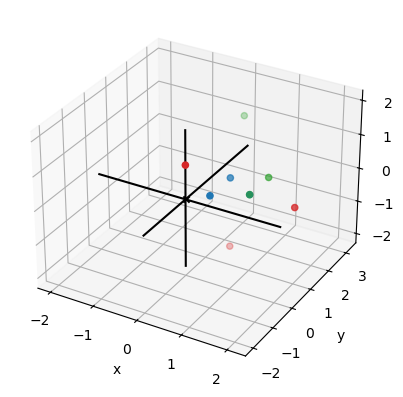

In [8]:
# Matrix multiplication

A = (
    (1,1,0),
    (1,0,1),
    (1,-1,1)
)

B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)

v = (3,-2,5)

colors = [blue, red, green]

draw3d(
    *[Points3D(*m, color=colors[i]) for i, m in enumerate([A, zip(*B), matrix_multiply(A,B)])]
)

In [9]:
# Exercise 5.1 

def infer_matrix(n, transformation):
    def standard_basis_vector(i):
        return tuple(1 if i==j else 0 for j in range(1, n+1))
    standard_basis = [standard_basis_vector(i) for i in range(1, n+1)]
    cols = [transformation(v) for v in standard_basis]
    return tuple(zip(*cols))

infer_matrix(3, rotate_z_by(pi/2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

In [10]:
# Exercise 5.2
A = ((1.3, 0.7),
     (6.5, 3.2)
    )

b = (-2.5, 0.3)

multiply_matrix_vector(A, b)

(-3.04, -15.29)

In [11]:
# Exercise 5.3
def random_matrix(rows, cols, min=-2, max=2):
    return tuple(
        tuple(randint(min, max) for j in range(0, cols))
        for i in range(0, rows)
    )

reduce(matrix_multiply, [random_matrix(3,3) for m in range(0,5)])

((10, 28, -72), (20, -12, 46), (32, -36, 118))

In [12]:
# Exercise 5.4
A = random_matrix(3,3)
B = random_matrix(3,3)

print(f"{A=}")
print(f"{B=}")

print(f"{matrix_multiply(A,B)=}")
print(f"{matrix_multiply(B,A)=}")

A=((2, 0, -2), (2, -1, -1), (2, 2, 2))
B=((1, -2, 0), (-2, 2, 2), (0, -2, 1))
matrix_multiply(A,B)=((2, 0, -2), (4, -4, -3), (-2, -4, 6))
matrix_multiply(B,A)=((-2, 2, 0), (4, 2, 6), (-2, 4, 4))


In [19]:
# Exercise 5.10
a = ((1,1,0),(1,0,1),(1,-1,1))
b = ((0,2,1),(0,1,0),(1,0,-1))

def transform_a(v):
    return multiply_matrix_vector(a,v)

def transform_b(v):
    return multiply_matrix_vector(b, v)
compose_a_b = compose(transform_a, transform_b)

print(infer_matrix(3, compose_a_b))

print(matrix_multiply(a,b))

((0, 3, 1), (1, 2, 0), (1, 1, 0))
((0, 3, 1), (1, 2, 0), (1, 1, 0))


In [21]:
# Exercise 5.12
def matrix_power(power, matrix):
    result=matrix
    for _ in range(1, power):
        result = matrix_multiply(result,matrix)
    return result

matrix_power(5,a)

((12, 4, 5), (9, 3, 4), (4, 1, 2))

In [23]:
c = ((-1, -1, 0), (-2,1,2),(1,0,-1))
d = ((1,),(1,),(1,))
matrix_multiply(c,d)

((-2,), (1,), (0,))

In [25]:
c = ((-1, -1, 0), (-2,1,2),(1,0,-1))
d = ((1,),(1,),(1,))
multiply_matrix_vector(c,(1,1,1))

(-2, 1, 0)

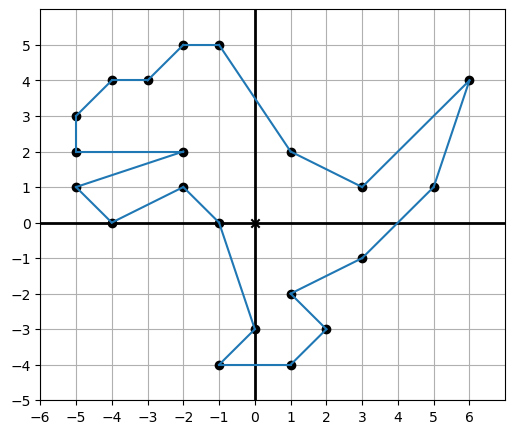

In [54]:
#5.3.1 Dino back
from vector_drawing import *
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

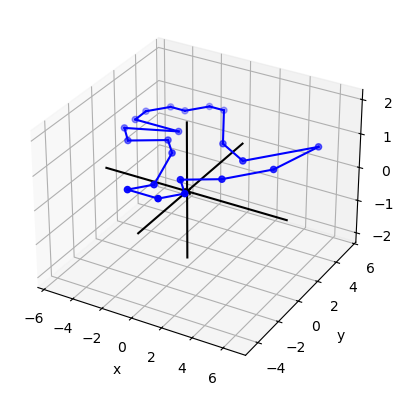

In [29]:
# Dino 2D to 3D
from draw3d import *

def polygon_segments_3d(points, color='blue'):
    count = len(points)
    return [Segment3D(points[i], points[(i+1) % count],color=color) for i in range(0, count)]

dino_3d = [(x, y, 1) for x,y in dino_vectors]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)

[(9, 5), (6, 2), (4, 3), (2, 6), (1, 6), (0, 5), (-1, 5), (-2, 4), (-2, 3), (1, 3), (-2, 2), (-1, 1), (1, 2), (2, 1), (3, -2), (2, -3), (4, -3), (5, -2), (4, -1), (6, 0), (8, 2)]


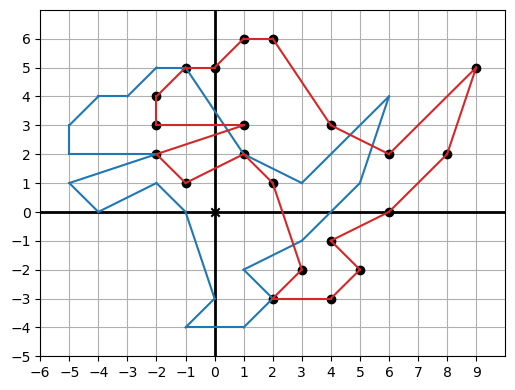

In [58]:
magic_matrix = (
    (1,0,3),
    (0,1,1),
    (0,0,1))

translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]

dino_2 = [(t[0], t[1]) for t in translated]
print(dino_2)

draw(
    Polygon(*dino_vectors),
    Points(*dino_2),
    Polygon(*dino_2, color=red)
)

In [59]:
def translate_3d(translation):
    def new_function(target): #1
        a,b,c = translation
        x,y,z = target
        matrix = ((1,0,0,a),(0,1,0,b),(0,0,1,c),(0,0,0,1)) #2
        vector = (x,y,z,1)
        x_out, y_out, z_out, _ = multiply_matrix_vector(matrix,vector) #3
        return (x_out,y_out,z_out)
    return new_function
